In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
#Retail Sales Dataset 
file_path = r"C:\Users\DELL\Downloads\retail_sales_dataset.csv"
retail_sales = pd.read_csv(file_path)
retail_sales

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [4]:
retail_sales.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
retail_sales.describe

<bound method NDFrame.describe of      Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amou

In [6]:
retail_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
retail_sales.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

Cleaning Data
--

In [8]:
retail_sales.duplicated().sum()

0

In [9]:
retail_sales.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Univariate Analysis
--

Descriptive statistics: Calculating statistics such as mean,median,mode,standard deviation etc. for numerical data.
Frequency Counts: Assessing how often each category within a categorical variable occurs.
--

In [10]:
retail_sales['Price per Unit'].mean()

179.89

In [11]:
retail_sales['Date'].min()

'2023-01-01'

In [12]:
retail_sales['Date'].max()

'2024-01-01'

In [13]:
retail_sales['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

In [14]:
retail_sales['Product Category'].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

In [15]:
retail_sales['Product Category'].describe()

count         1000
unique           3
top       Clothing
freq           351
Name: Product Category, dtype: object

In [16]:
retail_sales['Product Category'].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

In [17]:
retail_sales['Price per Unit'].describe()

count    1000.000000
mean      179.890000
std       189.681356
min        25.000000
25%        30.000000
50%        50.000000
75%       300.000000
max       500.000000
Name: Price per Unit, dtype: float64

In [18]:
data_dummies = pd.get_dummies(retail_sales, columns=['Gender', 'Product Category'])

In [19]:
data_dummies.head(3)

,Transaction ID,Date,Customer ID,Age,Quantity,Price per Unit,Total Amount,Gender_Female,Gender_Male,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics
0,1,2023-11-24,CUST001,34,3,50,150,False,True,True,False,False
1,2,2023-02-27,CUST002,26,2,500,1000,True,False,False,True,False
2,3,2023-01-13,CUST003,50,1,30,30,False,True,False,False,True


In [20]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Transaction ID                1000 non-null   int64 
 1   Date                          1000 non-null   object
 2   Customer ID                   1000 non-null   object
 3   Age                           1000 non-null   int64 
 4   Quantity                      1000 non-null   int64 
 5   Price per Unit                1000 non-null   int64 
 6   Total Amount                  1000 non-null   int64 
 7   Gender_Female                 1000 non-null   bool  
 8   Gender_Male                   1000 non-null   bool  
 9   Product Category_Beauty       1000 non-null   bool  
 10  Product Category_Clothing     1000 non-null   bool  
 11  Product Category_Electronics  1000 non-null   bool  
dtypes: bool(5), int64(5), object(2)
memory usage: 59.7+ KB


In [21]:
#boolean convert to integer
bool_columns = data_dummies.select_dtypes(include=['bool']).columns
data_dummies[bool_columns] = data_dummies[bool_columns].astype(int)

In [22]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Transaction ID                1000 non-null   int64 
 1   Date                          1000 non-null   object
 2   Customer ID                   1000 non-null   object
 3   Age                           1000 non-null   int64 
 4   Quantity                      1000 non-null   int64 
 5   Price per Unit                1000 non-null   int64 
 6   Total Amount                  1000 non-null   int64 
 7   Gender_Female                 1000 non-null   int32 
 8   Gender_Male                   1000 non-null   int32 
 9   Product Category_Beauty       1000 non-null   int32 
 10  Product Category_Clothing     1000 non-null   int32 
 11  Product Category_Electronics  1000 non-null   int32 
dtypes: int32(5), int64(5), object(2)
memory usage: 74.3+ KB


In [23]:
data_dummies.head(3)

,Transaction ID,Date,Customer ID,Age,Quantity,Price per Unit,Total Amount,Gender_Female,Gender_Male,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics
0,1,2023-11-24,CUST001,34,3,50,150,0,1,1,0,0
1,2,2023-02-27,CUST002,26,2,500,1000,1,0,0,1,0
2,3,2023-01-13,CUST003,50,1,30,30,0,1,0,0,1


In [24]:
if 'Date' in data_dummies.columns:
    data_dummies.drop('Date', axis=1, inplace=True)
else:
    print("'Date' column not found in data_dummies")


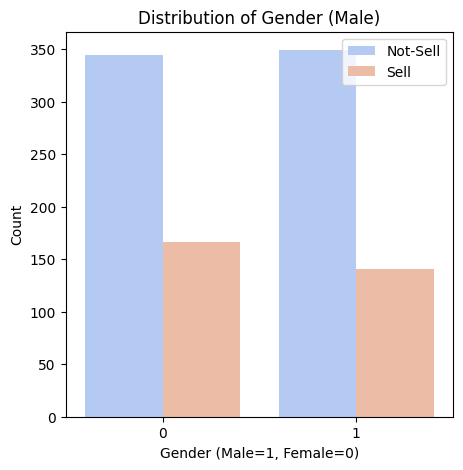

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.countplot(data=data_dummies, x='Gender_Male',hue='Product Category_Beauty',palette='coolwarm')
plt.xlabel('Gender (Male=1, Female=0)')
plt.ylabel('Count')
plt.title('Distribution of Gender (Male)')
plt.legend(['Not-Sell','Sell'])
plt.show()

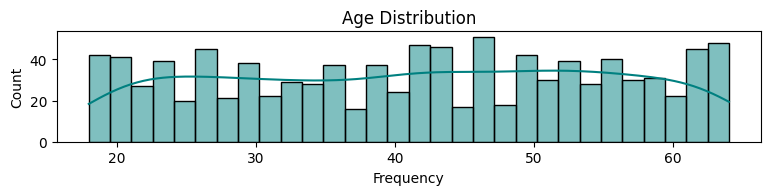

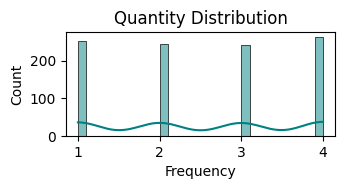

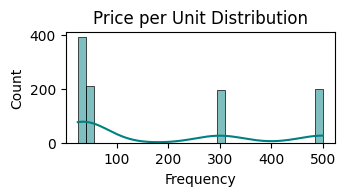

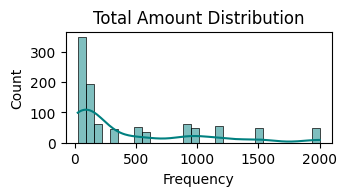

In [73]:
#distribution of numerical values 
plt.figure(figsize=(15,5))
num_features=['Age','Quantity','Price per Unit','Total Amount']          
for i,column in enumerate(num_features):
    plt.subplot(3,2,i+1)
    sns.histplot(data_dummies[column],color='teal',kde=True,bins=30)
    plt.title(f'{column} Distribution')
    plt.xlabel('Frequency')
    plt.tight_layout()
    plt.show()

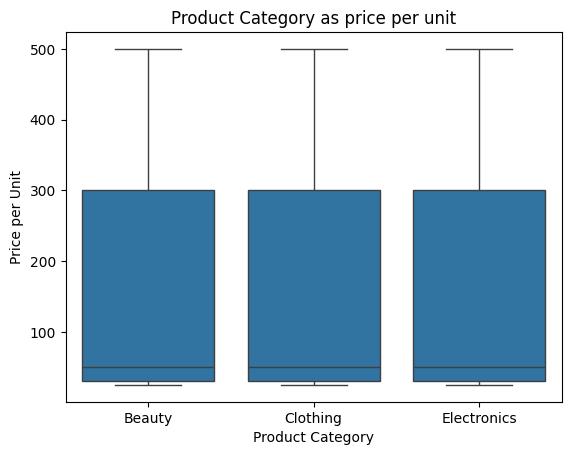

In [74]:
#plt.figure(figsize=(17,5))
title = 'Product Category as price per unit'
#plt.figure(figsize=(12, 6))
sns.boxplot(x='Product Category', y='Price per Unit', data=retail_sales)
plt.title(title)
plt.xlabel('Product Category')
plt.ylabel('Price per Unit')

plt.show()

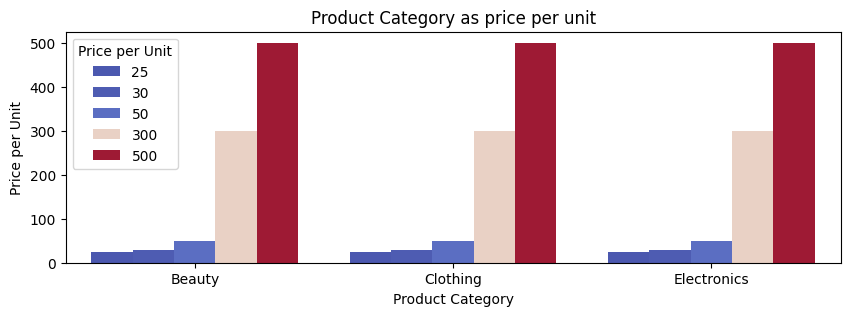

In [75]:
title = 'Product Category as price per unit'
plt.figure(figsize=(10,3))
sns.barplot(x='Product Category', y='Price per Unit', data=retail_sales,hue='Price per Unit',palette='coolwarm')
plt.title(title)
plt.xlabel('Product Category')
plt.ylabel('Price per Unit')

plt.show()

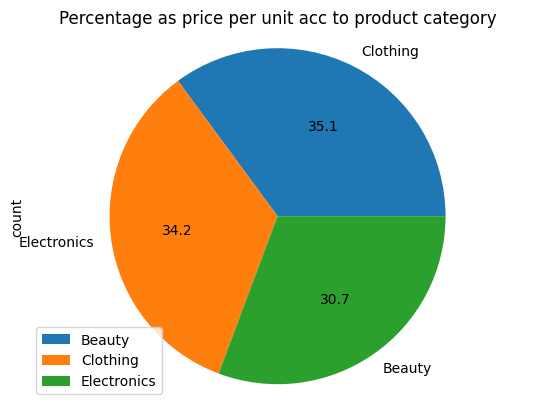

In [27]:
retail_sales['Product Category'].value_counts().plot(kind='pie',autopct='%.1f')
plt.title('Percentage as price per unit acc to product category')
plt.legend(['Beauty', 'Clothing','Electronics'])
plt.axis('equal')
plt.show()

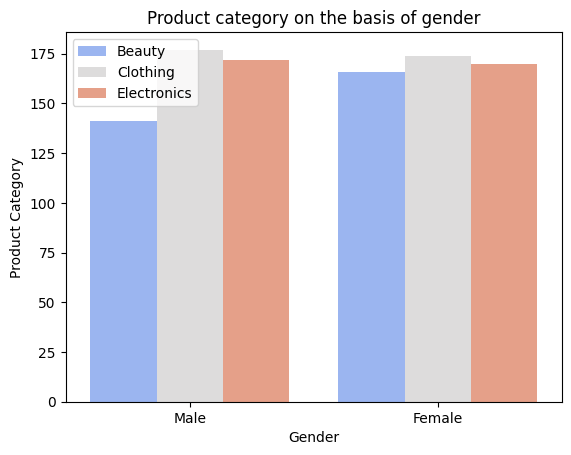

In [28]:
sns.countplot(data=retail_sales,x='Gender',hue='Product Category',palette='coolwarm')
plt.title('Product category on the basis of gender')
plt.xlabel('Gender')
plt.ylabel('Product Category')
plt.legend(['Beauty','Clothing','Electronics'])
plt.show()

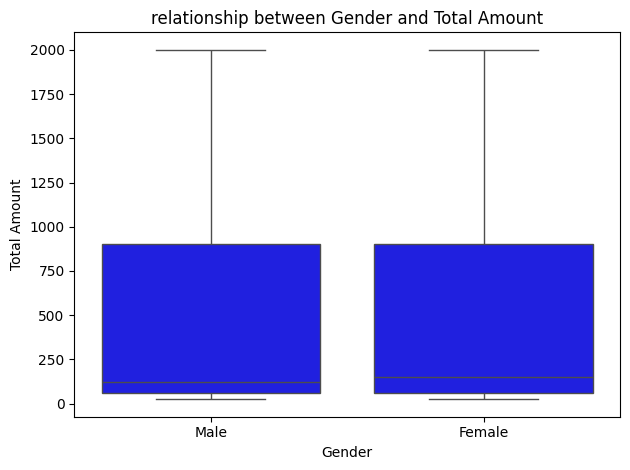

In [55]:
sns.boxplot(x='Gender',y='Total Amount',data=retail_sales,color='blue')
plt.title('relationship between Gender and Total Amount')
plt.xlabel('Gender')
plt.ylabel('Total Amount')
plt.tight_layout()
plt.show()

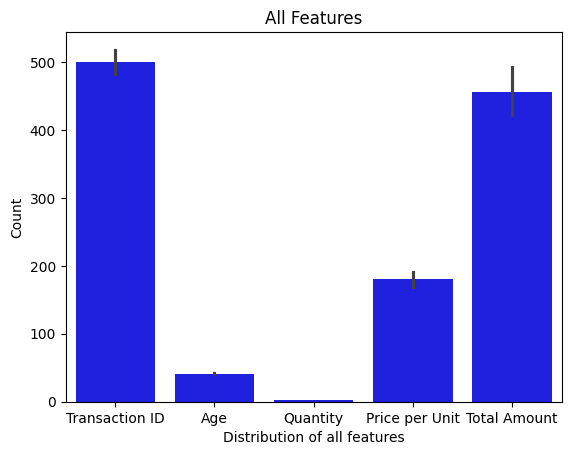

In [60]:
sns.barplot(data=retail_sales,color='blue')
plt.xlabel('Distribution of all features')
plt.ylabel('Count')
plt.title('All Features')
plt.show()

Feature Engineering
--

In [61]:
bins = [18,30,40,50,60,70]
labels=['18-29','30-39', '40-49', '50-59', '60+']
data1=retail_sales['age_group'] = pd.cut(retail_sales['Age'],bins=bins,labels=labels)


In [62]:
data1.head(3)

0    30-39
1    18-29
2    40-49
Name: Age, dtype: category
Categories (5, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60+']

In [63]:
summary = retail_sales.groupby(['age_group', 'Gender']).agg(
    average_purchase_value=pd.NamedAgg(column='Total Amount', aggfunc='mean'),
    total_expenditure=pd.NamedAgg(column='Total Amount', aggfunc='sum')
).reset_index()
summary

C:\Users\DELL\AppData\Local\Temp\ipykernel_17240\1169726701.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = retail_sales.groupby(['age_group', 'Gender']).agg(


,age_group,Gender,average_purchase_value,total_expenditure
0,18-29,Female,491.031746,61870
1,18-29,Male,475.079365,59860
2,30-39,Female,521.546392,50590
3,30-39,Male,472.500000,45360
4,40-49,Female,387.715517,44975
5,40-49,Male,464.952381,48820
6,50-59,Female,465.818966,54035
7,50-59,Male,442.788462,46050
8,60+,Female,319.761905,13430
9,60+,Male,388.137255,19795


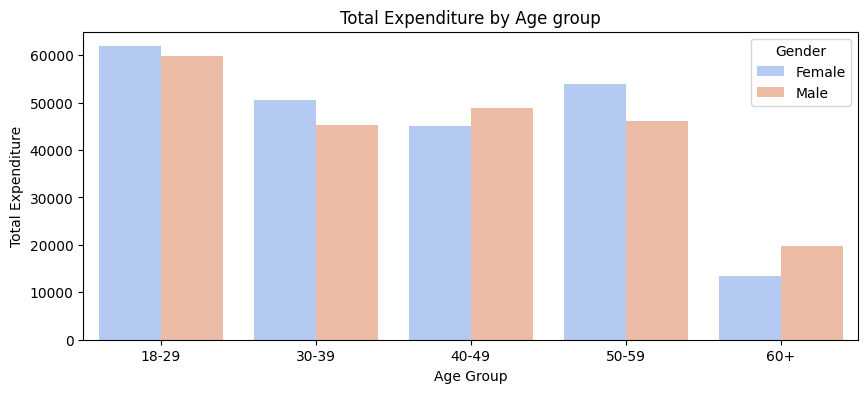

In [71]:
plt.figure(figsize=(10,4))
sns.barplot(x='age_group',y='total_expenditure',hue='Gender',data=summary,palette='coolwarm')
plt.xlabel('Age Group')
plt.ylabel('Total Expenditure')
plt.title('Total Expenditure by Age group')
plt.show()

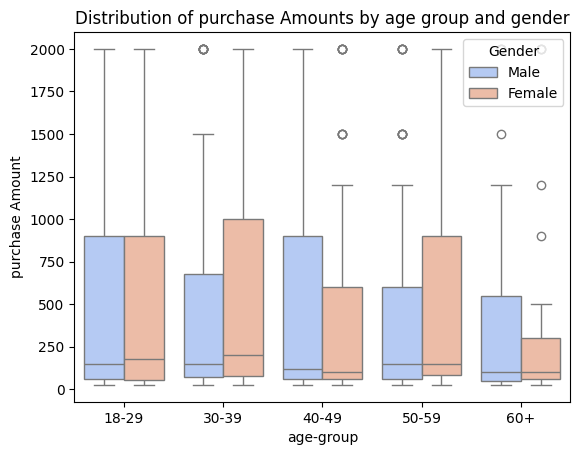

In [72]:
sns.boxplot(x='age_group',y='Total Amount',hue='Gender',data=retail_sales,palette='coolwarm')
#plt.figure(figsize=(12,6))
plt.title('Distribution of purchase Amounts by age group and gender')
plt.xlabel('age-group')
plt.ylabel('purchase Amount')
plt.show()